<font color='salmon' size="4">Clustering customer</font> 


###### Source : http://inseaddataanalytics.github.io/INSEADAnalytics/Report_s45.html

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

#plt.rcParams['figure.figsize'] = 12, 50
sns.set_style("dark")
sns.set_palette("pastel")


In [18]:
data=pd.read_csv("insead_clustering.csv",sep=";")

del data["ID"]
data.describe()


,V1,V2,V3,V4,V5,V6,Income,Mall.Visits
count,40.000000,40.000000,40.000000,40.000000,40.0000,40.000000,40.00000,40.00000
mean,3.850000,4.100000,3.950000,4.100000,3.4500,4.350000,46000.00000,3.25000
std,1.874936,1.392286,1.986493,1.498717,1.7387,1.477177,17216.56924,1.94475
min,1.000000,2.000000,1.000000,2.000000,1.0000,2.000000,25000.00000,0.00000
25%,2.000000,3.000000,2.000000,3.000000,2.0000,3.000000,30000.00000,2.00000
50%,4.000000,4.000000,4.000000,4.000000,3.5000,4.000000,42500.00000,3.00000
75%,5.250000,5.000000,6.000000,5.250000,4.2500,5.250000,60000.00000,4.25000
max,7.000000,7.000000,7.000000,7.000000,7.0000,7.000000,80000.00000,7.00000


In [19]:
norm=lambda x: (x - np.mean(x)) / (np.std(x))

data.apply(norm)

,V1,V2,V3,V4,V5,V6,Income,Mall.Visits
0,1.161314,-0.072739,1.554929,-0.743311,-0.844581,-0.925548,0.823529,-0.130189
1,-0.999270,-0.800132,-1.503948,-0.067574,0.902828,-0.239957,-0.941176,-1.171700
2,1.701460,-1.527525,1.045116,-0.067574,-1.427050,-0.925548,1.411765,-0.130189
3,0.081022,1.382047,0.025491,0.608164,-0.262111,1.131225,-0.941176,1.952834
4,-1.539416,-0.800132,-0.994135,-1.419048,1.485297,-0.239957,0.823529,-1.171700
5,1.161314,-0.072739,1.045116,-0.743311,-0.262111,-0.239957,0.235294,-0.650945
6,0.621168,-0.800132,1.045116,-0.743311,-0.262111,-0.239957,1.117647,-0.130189
7,1.701460,-0.800132,1.554929,-0.067574,-1.427050,-0.239957,0.529412,0.390567
8,-0.999270,-0.072739,-0.484322,-0.743311,1.485297,-0.925548,1.411765,-1.692456
9,-0.459124,0.654654,-0.484322,1.283901,0.320358,1.131225,-1.235294,1.432078


In [20]:
K = range(1, 10)
list_result=[]
X=data[data.columns[:5]]
for k in K:
    
    cluster = KMeans(n_clusters=k)
    cluster.fit(X)
    list_result.append(sum(np.min(cdist(X, cluster.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

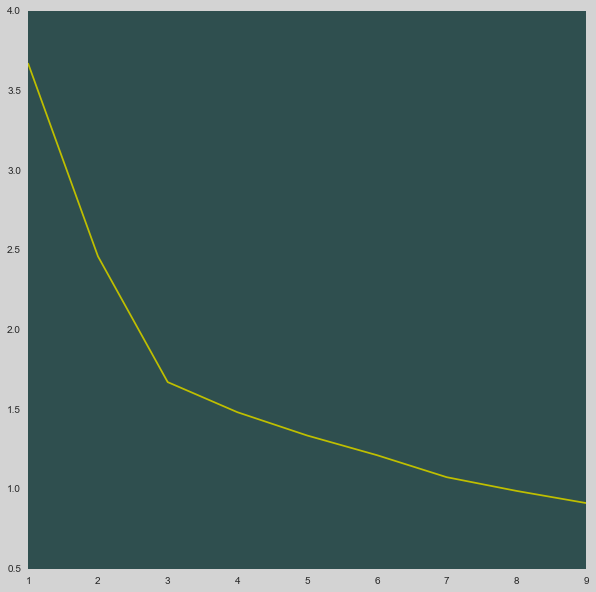

In [21]:
fig = plt.figure(figsize=(10,10),facecolor='lightgray')
ax = fig.add_subplot(1,1,1, axisbg='darkslategray')

ax.plot(K,list_result,color="y")

In [22]:
K = range(2, 10)
list_result=[]
X=data[data.columns[:5]]
for k in K:
    
    cluster = KMeans(n_clusters=k)
    cluster_a=cluster.fit(X)
    list_result.append(metrics.silhouette_score(X, cluster_a.labels_,metric='euclidean'))
    #list_result.append(sum(np.min(cdist(X, cluster.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

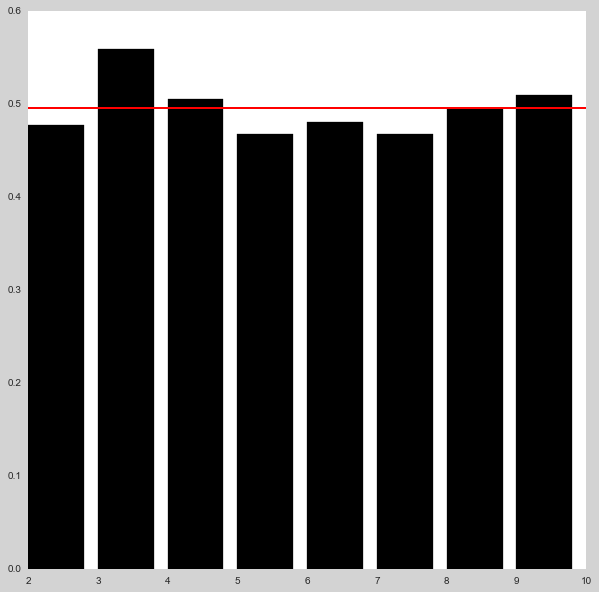

In [23]:
fig = plt.figure(figsize=(10,10),facecolor='lightgray')
ax = fig.add_subplot(1,1,1, axisbg='white')
ax.bar(K,list_result,color="black")
ax.axhline(np.mean(list_result), color='r', linewidth=2)

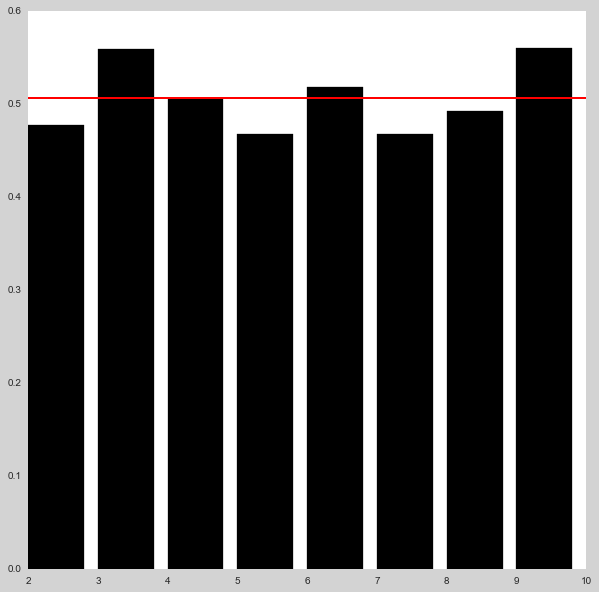

In [24]:
K = range(2, 10)
list_result=[]
X=data[data.columns[:5]]
for k in K:
    
    cluster = AgglomerativeClustering(linkage="ward",n_clusters=k)
    cluster_a=cluster.fit(X)
    list_result.append(metrics.silhouette_score(X, cluster_a.labels_,metric='euclidean'))
    #list_result.append(sum(np.min(cdist(X, cluster.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    

fig = plt.figure(figsize=(10,10),facecolor='lightgray')
ax = fig.add_subplot(1,1,1, axisbg='white')
ax.bar(K,list_result,color="black")
ax.axhline(np.mean(list_result), color='r', linewidth=2)

In [14]:
cluster_h=AgglomerativeClustering(linkage="ward",n_clusters=3)

data['cluster2'] = cluster_h.fit_predict(data[data.columns[:5]])



In [16]:

data_ok=data.groupby(by=["cluster1"]).describe()



Income  Mall.Visits         V1         V2         V3  \
cluster1                                                                     
0        count     12.000000    12.000000  12.000000  12.000000  12.000000   
         mean   42500.000000     1.000000   1.666667   3.000000   1.833333   
         std    17516.226244     0.852803   0.492366   0.603023   0.717741   
         min    25000.000000     0.000000   1.000000   2.000000   1.000000   
         25%    30000.000000     0.000000   1.000000   3.000000   1.000000   
         50%    35000.000000     1.000000   2.000000   3.000000   2.000000   
         75%    60000.000000     2.000000   2.000000   3.000000   2.000000   
         max    70000.000000     2.000000   2.000000   4.000000   3.000000   
1        count     16.000000    16.000000  16.000000  16.000000  16.000000   
         mean   60000.000000     3.250000   5.750000   3.625000   6.000000   
         std    10954.451150     0.683130   1.000000   0.885061   1.032796   
         min    45000.000000     2.000000   4.000000   2.000000   4.000000   
         25%    53750.000000     3.000000   5.000000   3.000000   5.750000   
         50%    57500.000000     3.000000   6.000000   4.000000   6.000000   
         75%    66250.000000     4.000000   6.250000   4.000000   7.000000   
         max    80000.000000     4.000000   7.000000   5.000000   7.000000   
2        count     12.000000    12.000000  12.000000  12.000000  12.000000   
         mean   30833.333333     5.500000   3.500000   5.833333   3.333333   
         std     5573.204290     1.000000   0.522233   0.717741   0.778499   
         min    25000.000000     4.000000   3.000000   5.000000   2.000000   
         25%    25000.000000     5.000000   3.000000   5.000000   3.000000   
         50%    30000.000000     5.500000   3.500000   6.000000   3.500000   
         75%    35000.000000     6.000000   4.000000   6.000000   4.000000   
         max    40000.000000     7.000000   4.000000   7.000000   4.000000   

                       V4         V5         V6  cluster2  
cluster1                                                   
0        count  12.000000  12.000000  12.000000        12  
         mean    3.500000   5.500000   3.333333         1  
         std     1.000000   1.000000   0.778499         0  
         min     2.000000   4.000000   2.000000         1  
         25%     3.000000   5.000000   3.000000         1  
         50%     3.500000   5.500000   3.500000         1  
         75%     4.000000   6.000000   4.000000         1  
         max     5.000000   7.000000   4.000000         1  
1        count  16.000000  16.000000  16.000000        16  
         mean    3.125000   1.875000   3.875000         0  
         std     0.806226   0.806226   0.619139         0  
         min     2.000000   1.000000   3.000000         0  
         25%     2.750000   1.000000   3.750000         0  
         50%     3.000000   2.000000   4.000000         0  
         75%     4.000000   2.250000   4.000000         0  
         max     4.000000   3.000000   5.000000         0  
2        count  12.000000  12.000000  12.000000        12  
         mean    6.000000   3.500000   6.000000         2  
         std     0.603023   0.797724   1.477098         0  
         min     5.000000   2.000000   3.000000         2  
         25%     6.000000   3.000000   6.000000         2  
         50%     6.000000   4.000000   6.500000         2  
         75%     6.000000   4.000000   7.000000         2  
         max     7.000000   4.000000   7.000000         2